# **2nd Assignment of Internship**
**Objective:--Hand Written Digit Prediction-Classification Analysis**

The digits dataset consists of 8*8 pixel images of digits. The image attributes of the dataset stores 8*8 arrays of grayscale values for each image .We will use these arrays to visulize the first 4 images. The target attribute of the dataset stores the digit each image represents.

**1. Import Library**:--

In this step, the necessary libraries are imported:

1. pandas for data manipulation and analysis.
2. load_digits from sklearn.datasets to load the digits dataset.
3. matplotlib.pyplot for data visualization.
4. train_test_split from sklearn.model_selection to split the dataset into training and testing sets.
5. RandomForestClassifier from sklearn.ensemble for implementing the Random Forest model.
6. confusion_matrix and classification_report from sklearn.metrics to evaluate model performance.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

 **2. Import Data**

In this step:

1. The digits dataset is loaded using load_digits().
2. A subplot with four axes is created to visualize the first four images along with their labels.
3. Each image is displayed using imshow, and its corresponding label is set as the title.

In [ ]:
from sklearn.datasets import load_digits

In [ ]:
df=load_digits()

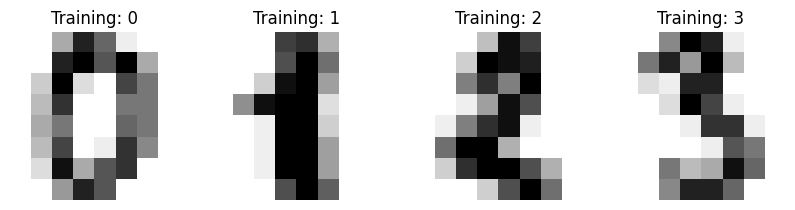

In [ ]:
_,axes=plt.subplots(nrows=1,ncols=4,figsize=(10,3))
for ax,image,label in zip(axes,df.images,df.target):
  ax.set_axis_off()
  ax.imshow(image,cmap=plt.cm.gray_r,interpolation="nearest")
  ax.set_title("Training: %i" % label)

**Data Preprocessing**

Flatten Image

1. The shape of the first image in the dataset is examined to understand its dimensions (8x8).
2. The total number of images in the dataset is determined.
The images are reshaped into a 2D array where each row represents a flattened image.
3. The shape and content of the first flattened image are displayed.


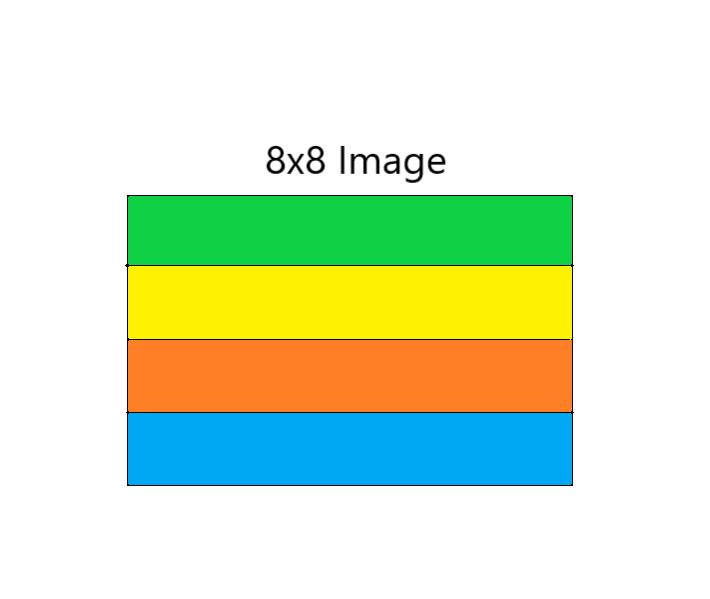


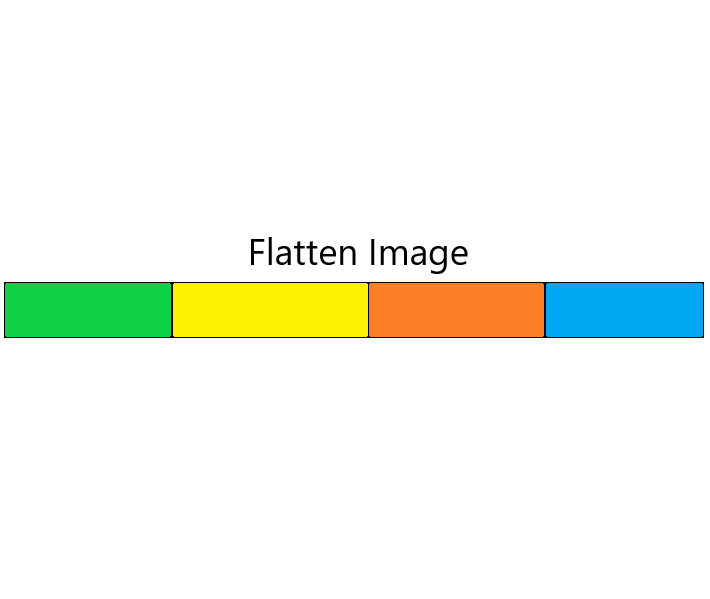

In [ ]:
df.images.shape

(1797, 8, 8)

In [ ]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [ ]:
df.images[0].shape

(8, 8)

In [ ]:
len(df.images)

1797

In [ ]:
n_samples=len(df.images)
data=df.images.reshape((n_samples,-1))

In [ ]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [ ]:
data[0].shape

(64,)

In [ ]:
data.shape

(1797, 64)

**Scaling Image Data**

1. The pixel values of the images are scaled by dividing them by 16 to bring them to the range [0, 1].
2. The minimum and maximum pixel values are checked to ensure successful scaling.
3. The scaled pixel values of the first image are displayed.

In [ ]:
data.min()

0.0

In [ ]:
data.max()

16.0

In [ ]:
data=data/16

In [ ]:
data.min()

0.0

In [ ]:
data.max()

In [ ]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

**Train Test Split Data**

1. The dataset is split into training and testing sets using train_test_split.
2. The size of the training and testing sets is displayed.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(data,df.target,test_size=0.3)

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

**Random Forest Model**

1. A Random Forest Classifier is instantiated.
2. The model is trained on the training set using fit.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf=RandomForestClassifier()

In [ ]:
rf.fit(x_train,y_train)

RandomForestClassifier()

**Predict Test Data**

The trained model is used to predict the digits for the test set.

In [ ]:
y_pred=rf.predict(x_test)

In [ ]:
y_pred

array([2, 6, 2, 9, 6, 0, 0, 3, 8, 0, 7, 4, 1, 3, 2, 7, 9, 6, 0, 3, 1, 1,
       5, 6, 2, 0, 0, 7, 9, 6, 6, 1, 1, 7, 8, 5, 6, 1, 0, 5, 5, 2, 6, 2,
       7, 6, 1, 4, 6, 8, 0, 5, 9, 0, 7, 1, 4, 4, 4, 5, 7, 9, 6, 9, 7, 5,
       7, 6, 7, 3, 6, 9, 5, 6, 0, 2, 1, 5, 6, 6, 0, 8, 0, 6, 9, 6, 4, 1,
       3, 1, 0, 8, 0, 6, 6, 4, 2, 3, 2, 5, 0, 0, 6, 1, 8, 1, 7, 3, 3, 3,
       0, 3, 7, 3, 9, 2, 5, 4, 2, 0, 5, 1, 0, 0, 5, 7, 9, 5, 6, 8, 4, 9,
       5, 3, 1, 3, 3, 9, 7, 5, 7, 2, 9, 3, 2, 1, 0, 0, 6, 8, 1, 3, 0, 2,
       4, 8, 3, 5, 3, 2, 7, 6, 0, 9, 3, 1, 0, 9, 8, 7, 1, 7, 3, 8, 3, 0,
       2, 3, 1, 4, 1, 7, 0, 1, 8, 2, 2, 8, 6, 1, 7, 5, 2, 6, 1, 4, 5, 8,
       8, 2, 5, 9, 6, 3, 2, 0, 7, 9, 0, 8, 3, 4, 4, 4, 4, 1, 5, 8, 1, 6,
       4, 9, 5, 9, 3, 7, 0, 5, 0, 4, 8, 3, 3, 5, 8, 3, 0, 7, 8, 1, 7, 1,
       2, 1, 8, 6, 4, 4, 0, 8, 7, 8, 6, 8, 7, 0, 7, 5, 7, 4, 3, 8, 4, 5,
       8, 1, 1, 3, 5, 7, 0, 2, 5, 5, 5, 7, 6, 2, 9, 4, 4, 2, 4, 1, 6, 8,
       5, 1, 3, 7, 5, 3, 1, 5, 8, 8, 0, 6, 0, 0, 2,

**Model Accuracy**

The confusion matrix and classification report are used to evaluate the accuracy, precision, recall, and F1 score of the model on the test set.

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
confusion_matrix(y_test,y_pred)

array([[58,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 58,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 55,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 62,  0,  2,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 45,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 53,  1,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0, 54,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 51,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 51,  1],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  1, 45]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        59
           1       1.00      1.00      1.00        58
           2       1.00      1.00      1.00        55
           3       0.98      0.97      0.98        64
           4       0.98      1.00      0.99        45
           5       0.96      0.98      0.97        54
           6       0.98      0.98      0.98        55
           7       1.00      1.00      1.00        51
           8       0.98      0.98      0.98        52
           9       0.98      0.96      0.97        47

    accuracy                           0.99       540
   macro avg       0.98      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540



**Explanations**

The primary objective of this project is to develop a classification model for predicting handwritten digits using the digits dataset. The dataset consists of 8x8 pixel images, where each image is represented by an 8x8 array of grayscale values. The target attribute of the dataset stores the digit each image represents. The project involves data preprocessing, model training using the Random Forest algorithm, and evaluating the model's accuracy.

1. Import Libraries: Import necessary libraries, including pandas for data handling, scikit-learn for machine learning tasks, and matplotlib for data visualization.

2. Import Data: Load the digits dataset using scikit-learn's load_digits function and visualize the first four images along with their labels using matplotlib.

3. Data Preprocessing: Flatten the 8x8 image arrays, scale the pixel values, and perform train-test split to prepare the data for model training.

4. Random Forest Model: Initialize a Random Forest Classifier, fit the model on the training data, and predict the digits for the test set.

5. Model Accuracy: Evaluate the model's accuracy using confusion matrix and classification report, providing insights into precision, recall, and F1 score for each digit class.

